# AE 771
## Henry Hunt

In [9]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [10]:
# Example 2-1 | Page 31

Mo=200 #Mass Initial | kg
Mf=130 #Mass After Rocket Operation | kg
Mpl=110 #Mass of Payload, Nonpropulsive structure
t=3 #Rocket Operation Duration | Seconds
ΔIsp=240 #Average Specific Impulse of Propellant | Seconds
Mp=Mo-Mf #Mass of Propellant

ζ=Mp/Mo
MR=Mf/Mo




ρ= #Density
ρh20= #Density of H2O at 4 degrees Celcius
SG=ρ/ρh2o #Specific Gravity
g=9.81 #Force of Gravity (Usually at sea level)
γ=ρ*g #Specific Weight


SyntaxError: invalid syntax (<ipython-input-10-59a25c4cdb2f>, line 16)

In [ ]:
# Example 2-2 | Page 34



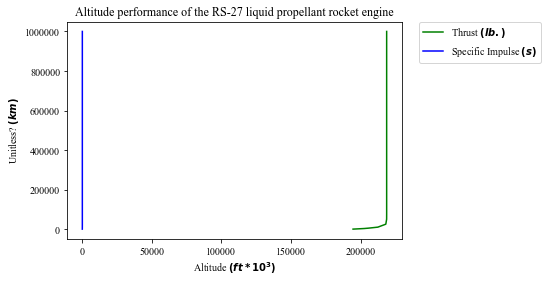

In [11]:
# Homework 3 | Provided as a handout

#Plot the variation of thrust and specific impulse againt altitude. Use atmospheric pressure from the text appendix

#Initial Variables
P2=8.66   #Pressure | psia (Remains constant with altitude)
F=194600  #Sea-Level Thrust | lbs
Isp=254   #Sea-Level Specific Impulse | Seconds
A2=1642   #Area | inches^2
g=32.2    #Force of Gravity | ft/s^2
P3=14.696

#Calculations
C=Isp*g
mdot=F/C #Using F and C
wdot=mdot*g #Using mdot and go
V2=(F-((P2-P3)*A2))/mdot #At sea level, using F, mdot, p2, p3, A2.

P3=P3*np.array([1,8.87*10**-1,6.6919*10**-1,5.3313*10**-1,2.6151*10**-1,2.5158*10**-2,7.8735*10**-4,2.0408*10**-5,3.1593*10**-7,1.2341*10**-8,2.9997*10**-9,8.3628*10**-10,8.6557*10**-11,1.4328*10**-11,8.1056*10**-13,7.4155*10**-14])
Alt=1000*np.array([0,1,3,5,10,25,50,75,100,130,160,200,300,400,600,1000])
F=mdot*V2+(P2-P3)*A2
Isp=F/wdot

#Outputs
plt.plot()
plt.plot(F,Alt, label="Thrust $(lb.)$",color="green")
plt.plot(Isp,Alt, label="Specific Impulse $(s)$",color="blue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Altitude $(ft*10^3)$")
plt.ylabel("Unitless? $(km)$")
plt.title("Altitude performance of the RS-27 liquid propellant rocket engine")
plt.show()